In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300

In [3]:
df = pd.read_csv(r"C:\Users\Tshepo\Desktop\MLAgortihms\Datasets\Salary_Data.csv")

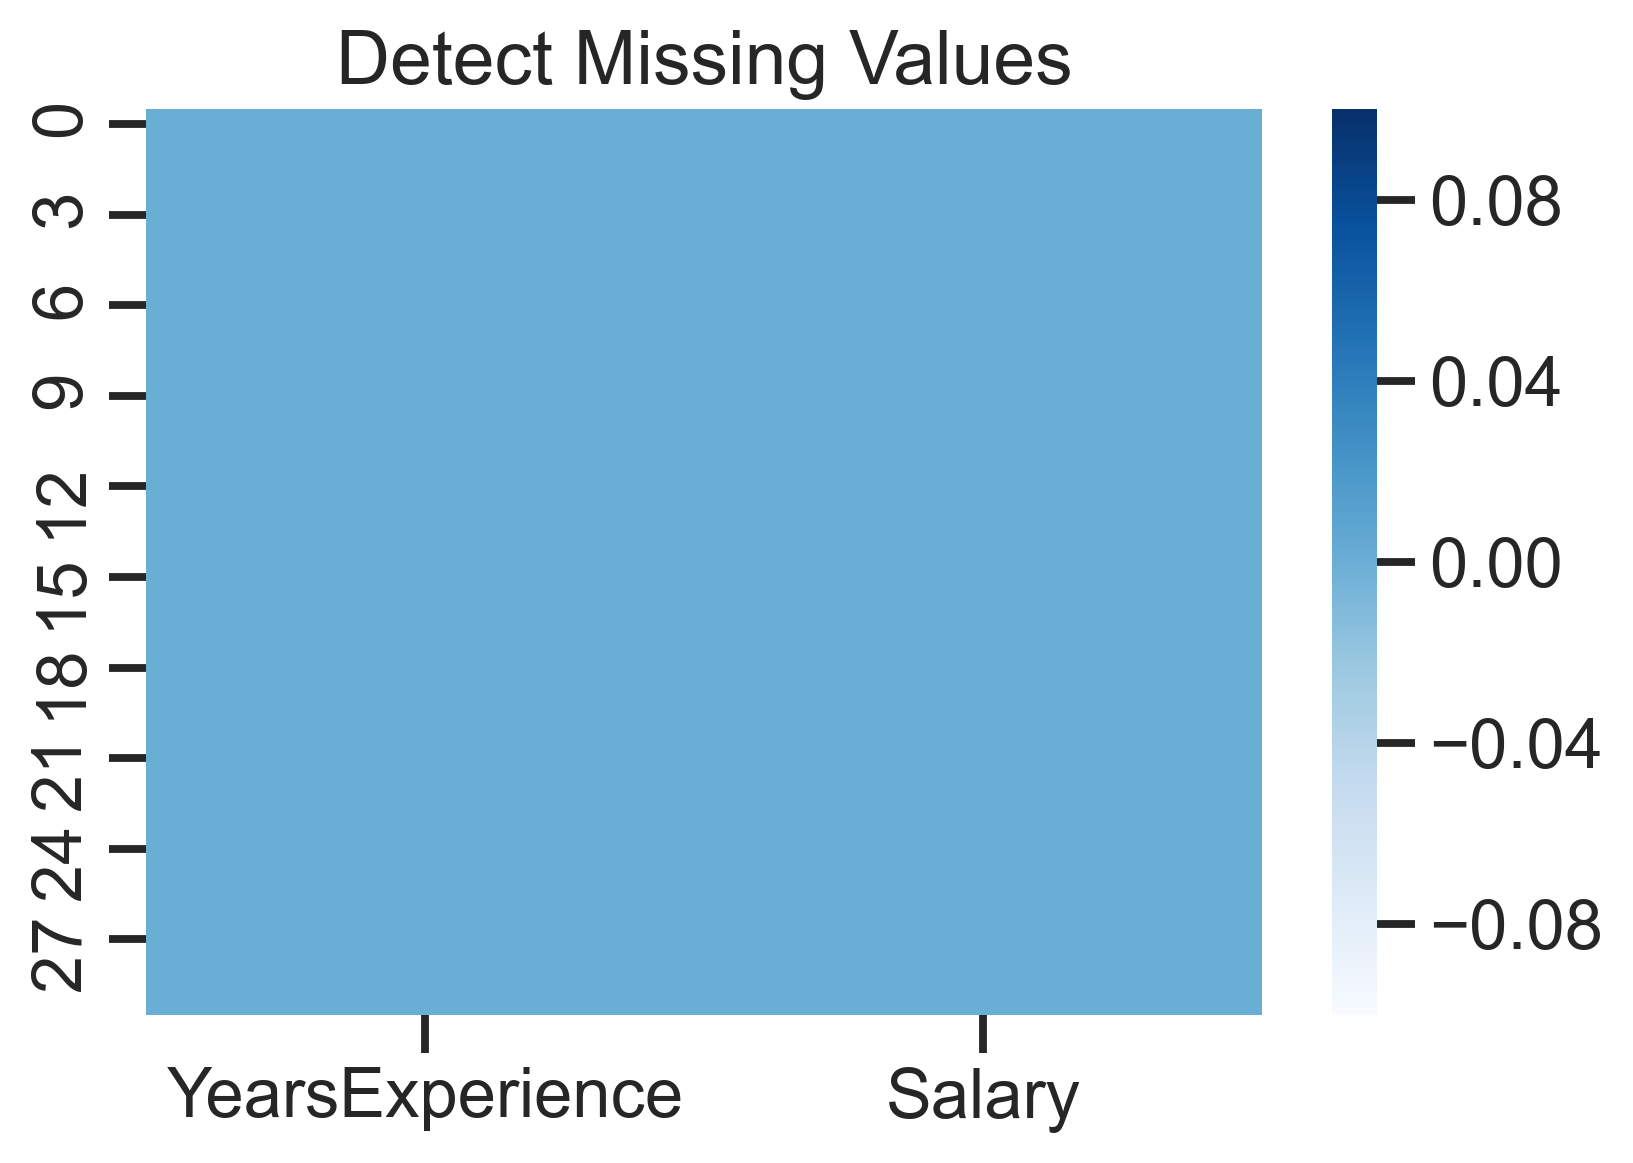

In [4]:
sns.heatmap(df.isnull(),cmap="Blues")
plt.title("Detect Missing Values")
plt.show()

In [5]:
x = np.array(df["YearsExperience"])
y = np.array(df["Salary"])

In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
lm = LinearRegression().fit(x_train,y_train)
ridge = Ridge().fit(x_train,y_train)
ridgecv = RidgeCV().fit(x_train,y_train)
lasso = Lasso().fit(x_train,y_train)

In [10]:
def get_val_score(model):
    scores = cross_val_score(model, x_train, y_train, scoring="r2")
    print("CV mean: ", np.mean(scores))
    print("CV std: ", np.std(scores))
    print("\n")
get_val_score(lm)

CV mean:  0.9214212758251933
CV std:  0.023210607840130314




In [11]:
get_val_score(lasso)

CV mean:  0.921419531924748
CV std:  0.023206293148070177




In [12]:
get_val_score(ridge)

CV mean:  0.9153473310227037
CV std:  0.017549658826114617




In [13]:
get_val_score(ridgecv)

CV mean:  0.9211351196336244
CV std:  0.0225636116877046




In [14]:
param_gridOLS = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_modelOLS  = GridSearchCV(estimator=lm, param_grid=param_gridOLS, n_jobs=-1)
grid_modelOLS.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
print("Best score", grid_modelOLS.best_score_, "Best parameters", grid_modelOLS.best_params_)

Best score 0.9214212758251933 Best parameters {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [17]:
alpharidge = [0.0001,0.001,0.01,0.1,1,10,100,1000]
param_gridridge = dict(alpha=alpharidge)
grid_modelridge  = GridSearchCV(estimator=ridge, param_grid=param_gridridge, n_jobs=-1)
grid_modelridge .fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print("Best score", grid_modelridge.best_score_, "Best parameters", grid_modelridge.best_params_)

Best score 0.9214210302820337 Best parameters {'alpha': 0.0001}


In [20]:
alphalasso = [0.0001,0.001,0.01,0.1,1,10,100,1000]
param_gridlasso = dict(alpha=alphalasso)
grid_modellasso = GridSearchCV(estimator=lasso, param_grid=param_gridlasso, n_jobs=-1)
grid_modellasso.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
print("Best score", grid_modellasso.best_score_, "Best parameters", grid_modellasso.best_params_)

Best score 0.9214212756509989 Best parameters {'alpha': 0.0001}


In [22]:
lm = LinearRegression(copy_X= True, fit_intercept=True, normalize=True).fit(x_train,y_train)
ridge = Ridge(alpha=0.0001).fit(x_train,y_train)
ridgecv = RidgeCV().fit(x_train,y_train)
lasso = Lasso(alpha=0.0001).fit(x_train,y_train)

In [23]:
y_predlm = lm.predict(x_test)
y_predlm = pd.DataFrame(y_predlm, columns = ["Ordinary Least Squared"])
y_predridge = ridge.predict(x_test)
y_predridge = pd.DataFrame(y_predridge, columns = ["Ridge"])
y_predridgecv = ridgecv.predict(x_test)
y_predridgecv = pd.DataFrame(y_predridgecv, columns = ["RidgeCV"])
y_predlasso = lasso.predict(x_test)
y_predlasso = pd.DataFrame(y_predlasso, columns = ["Lasso"])
prediction1 = pd.concat([y_predlm,y_predridge],axis=1)
prediction2 = pd.concat([y_predridgecv,y_predlasso],axis=1)
prediction3 = pd.concat([prediction1,prediction2],axis=1)
prediction3


,Ordinary Least Squared,Ridge,RidgeCV,Lasso
0,40748.961841,40749.099912,40886.460789,40748.961978
1,122699.622956,122699.419568,122497.077667,122699.622753
2,64961.657170,64961.694356,64998.688503,64961.657207
3,63099.142145,63099.187091,63143.901756,63099.142190
4,115249.562855,115249.390508,115077.930678,115249.562683
5,107799.502753,107799.361448,107658.783689,107799.502612


In [25]:
y_test = pd.DataFrame(y_test, columns = ["Actual"])
y_test

,Actual
0,37731.0
1,122391.0
2,57081.0
3,63218.0
4,116969.0
5,109431.0


In [28]:
MAElm = metrics.mean_absolute_error(y_test,y_predlm)
MAEridge = metrics.mean_absolute_error(y_test,y_predridge)
MAEridgecv = metrics.mean_absolute_error(y_test,y_predridgecv)
MAElasso = metrics.mean_absolute_error(y_test,y_predlasso)
MAEmodel = [[MAElm,MAEridge,MAEridgecv,MAElasso]]
MAEmodeldata = pd.DataFrame(MAEmodel, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso"), index=["MAE"]).transpose()
MSElm = metrics.mean_squared_error(y_test,y_predlm)
MSEridge = metrics.mean_squared_error(y_test,y_predridge)
MSEridgecv = metrics.mean_squared_error(y_test,y_predridgecv)
MSElasso = metrics.mean_squared_error(y_test,y_predlasso)
MSEmodel = [[MSElm,MSEridge,MSEridgecv,MSElasso]]
MSEmodeldata = pd.DataFrame(MSEmodel, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso"), index=["MSE"]).transpose()
RMSElm = np.sqrt(MSElm)
RMSEridge = np.sqrt(MSEridge)
RMSEridgecv = np.sqrt(MSEridgecv)
RMSElasso = np.sqrt(MSElasso)
RMSEmodel = [[RMSElm,RMSEridge,RMSEridgecv,RMSElasso]]
RMSEmodeldata = pd.DataFrame(RMSEmodel, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso"), index=["RMSE"]).transpose()
R2lm = metrics.r2_score(y_test,y_predlm)
R2ridge = metrics.r2_score(y_test,y_predridge)
R2ridgecv = metrics.r2_score(y_test,y_predridgecv)
R2lasso = metrics.r2_score(y_test,y_predlasso)
R2model = [[R2lm,R2ridge,R2ridgecv,R2lasso]]
R2modeldata = pd.DataFrame(R2model, columns = ("Ordinary Least Squared", "Ridge", "RidgeCV", "Lasso"), index=["R2"]).transpose()
modelevaluation1 = pd.concat([MAEmodeldata, MSEmodeldata],axis=1)
modelevaluation2 = pd.concat([RMSEmodeldata, R2modeldata],axis=1)
modelevaluation3 = pd.concat([modelevaluation1, modelevaluation2],axis=1)
modelevaluation3


,MAE,MSE,RMSE,R2
Ordinary Least Squared,2446.172369,1.282341e+07,3580.979237,0.988170
Ridge,2446.212465,1.282380e+07,3581.033624,0.988169
RidgeCV,2486.101806,1.323006e+07,3637.314964,0.987794
Lasso,2446.172409,1.282341e+07,3580.979292,0.988170
